### plot individual fitted parameters

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
sns.set_style("whitegrid")

In [10]:
# df = pd.read_csv('./params/fmri.csv')
df = pd.read_csv('../model_comparison/params/fmri.csv')

In [11]:
df.columns

Index(['model', 'subject', 'log_evidence', 'nll', 'parameters',
       'transformed_parameters'],
      dtype='object')

In [3]:
# df['subject'] = np.tile(np.arange(35),len(np.unique(df['model'])))

In [4]:
# def sig(x):
#     return 1./(1.+np.exp(-x))

In [13]:
np.unique(df['model'])

array(['io_fixed_freq', 'io_fixed_trans', 'io_jump_freq', 'io_jump_trans',
       'random', 'rw'], dtype=object)

In [6]:
# df['parameters_transformed'] = df['parameters'].apply(sig)

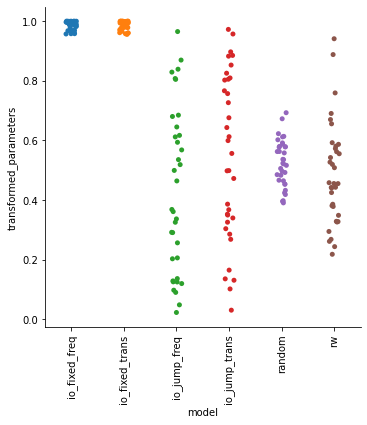

In [12]:
g = sns.catplot(data=df, x='model', y='transformed_parameters')
g.set_xticklabels(rotation=90)

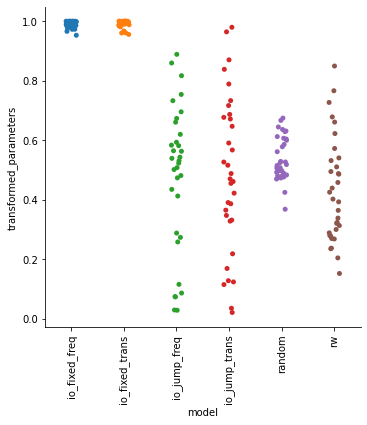

In [14]:
# df = pd.read_csv('./params/practice.csv')
df = pd.read_csv('../model_comparison/params/practice.csv')
# df['parameters_transformed'] = df['parameters'].apply(sig)
g = sns.catplot(data=df, x='model', y='transformed_parameters')
g.set_xticklabels(rotation=90)

In [96]:
import scipy

def plot_bins(df,sj_idx=None,cut_num=10,model=None):
    """bin average then correlate"""
    fig, ax = plt.subplots(figsize=(4,4))
    all_sj = np.unique(df['subject'])
    if sj_idx is not None:
        sj_ls = all_sj[sj_idx]
    else:
        sj_ls = all_sj
    n_sj = len(sj_ls)
    r_sj = np.empty((n_sj,))
    model_sj = np.empty((n_sj, cut_num))
    rate_sj = np.empty((n_sj, cut_num))
#     for idx, sj in enumerate(np.unique(df['subject'])):
    for idx, sj in enumerate(sj_ls):
        df_sj = df[df['subject']==sj]
        df_tmp = df_sj.dropna(subset=['p1'])
        model_rank = df_tmp['pmod_mean'].rank(method='max')
        model_cut = df_tmp.groupby(pd.qcut(model_rank, cut_num))['pmod_mean'].mean().values
        rate_cut = df_tmp.groupby(pd.qcut(model_rank, cut_num))['p1'].mean().values
        nas = np.logical_and(np.isnan(model_cut), np.isnan(rate_cut)) # get rid of nans
        # demean
#         mc_dm = demean(model_cut[~nas])
#         rc_dm = demean(rate_cut[~nas])
#         pr, pv = scipy.stats.pearsonr(mc_dm, rc_dm)
#         sns.regplot(x=mc_dm, y=rc_dm)
        # no demean
        pr, pv = scipy.stats.pearsonr(model_cut[~nas], rate_cut[~nas])
#         print(f'subject %d, pearsonr %.3f, pval %.3f' %(sj, pr, pv))
        if pr > 0:
            color = 'r'
        else:
            color = 'b'
        sns.regplot(x=model_cut[~nas], y=rate_cut[~nas], color=color, ax=ax, ci=None,
                    scatter_kws={'alpha':0.3}, line_kws={'linewidth':1})      
        
        r_sj[idx] = pr
        model_sj[idx,:] = model_cut
        rate_sj[idx,:] = rate_cut


#     ax.set_aspect('equal')#, adjustable='box')
#     plt.plot([0,1],[0,1], 'k-')
    plt.xlim(.3,.7)
    plt.ylim(0,1)
    # plt.xlim(0.,1)
    # plt.ylim(0.,1)
    plt.xlabel('model probability p(L)')
    plt.ylabel('subject rated probability p(L)')
    t0, p0 = scipy.stats.ttest_rel(r_sj,np.zeros((n_sj,)))
    print(np.mean(r_sj), t0, p0)
#     plt.title(f'Pearson r={np.mean(r_sj):.3f} (t({len(r_sj)})={t0:.3f}, p={p0:.3e})')
    plt.title(f'mean r={np.mean(r_sj):.3f}***')
    if model is not None:
        fig_name = f'bins_{model:s}.pdf'
        fig_path = os.path.join('figs',fig_name)
        plt.savefig(fig_path, bbox_inches='tight')

def demean(df):
    """demean"""
    df_dm = (df-np.mean(df))/np.std(df)
    return df_dm

0.5602377834209923 11.202881899600875 5.88641469139097e-13


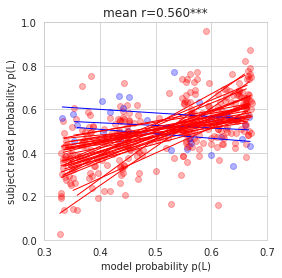

In [97]:
# df_pmod = pd.read_csv('./local_output/fmri_io_jump_freq.csv')
df_pmod = pd.read_csv('./local_output_mean/fmri_io_jump_freq.csv')
# io_idx = dfio[dfio['io_status']==True]['subject']
plot_bins(df_pmod, sj_idx=None, model=None)
plt.savefig('./figs/bins_fmri_io_jump_freq_all.png', bbox_inches='tight')

In [98]:
df = pd.read_csv('../model_comparison/local_output/subject_fmri.csv')
jf_sj = np.where(df.idxmax(axis=1)=='io_jump_freq')
jf_sj

(array([ 0,  1,  4,  6,  7,  9, 10, 12, 13, 14, 17, 19, 20, 23, 24, 25, 26,
        27, 28, 30, 31, 32, 33]),)

0.5578707812435263 8.352990115548872 2.8614052269878598e-08


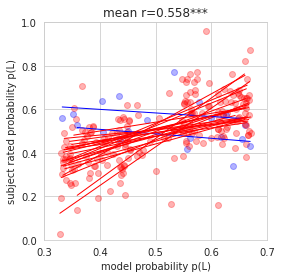

In [99]:
# df_pmod = pd.read_csv('./local_output/fmri_io_jump_freq.csv')
df_pmod = pd.read_csv('./local_output_mean/fmri_io_jump_freq.csv')
plot_bins(df_pmod, sj_idx=jf_sj, model=None)

0.44856106448563243 7.9157894343003345 3.211993975029194e-09


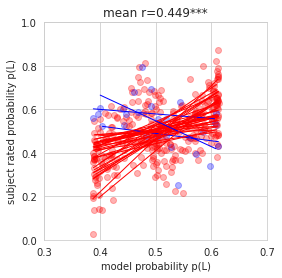

In [100]:
# df_pmod = pd.read_csv('./local_output/fmri_io_jump_trans.csv')
df_pmod = pd.read_csv('./local_output_mean/fmri_io_jump_trans.csv')
plot_bins(df_pmod, sj_idx=None, model=None)

In [101]:
df = pd.read_csv('../model_comparison/local_output/subject_fmri.csv')
jf_sj = np.where(df.idxmax(axis=1)=='io_jump_trans')
jf_sj

(array([ 2,  3,  5,  8, 11, 15, 16, 18, 21, 22, 29, 34]),)

0.6790629086359613 13.186205116084613 4.3896694124936454e-08


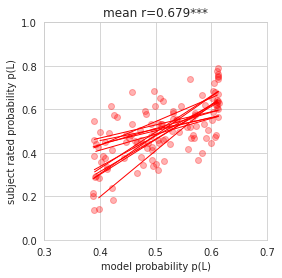

In [102]:
# df_pmod = pd.read_csv('./local_output/fmri_io_jump_trans.csv')
df_pmod = pd.read_csv('./local_output_mean/fmri_io_jump_trans.csv')
# plot_bins(df_pmod, sj_idx=None, model=None)
plot_bins(df_pmod, sj_idx=jf_sj, model=None)


0.4449553284968537 7.3153660184446805 2.5713861509382794e-08


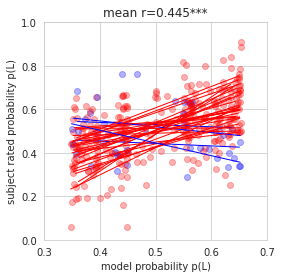

In [104]:
# df_pmod = pd.read_csv('./local_output/practice_io_jump_freq.csv')
df_pmod = pd.read_csv('./local_output_mean/practice_io_jump_freq.csv')
plot_bins(df_pmod, sj_idx=None, model=None)
plt.savefig('./figs/bins_practice_io_jump_freq_all.png', bbox_inches='tight')

In [105]:
df = pd.read_csv('../model_comparison/local_output/subject_practice.csv')
jf_sj = np.where(df.idxmax(axis=1)=='io_jump_freq')
jf_sj

(array([ 0,  1,  2,  3,  5,  9, 10, 11, 12, 14, 17, 18, 21, 22, 24, 25, 26,
        27, 28, 29, 30, 31, 32]),)

0.5057145512827305 7.238264239299015 2.981530660657988e-07


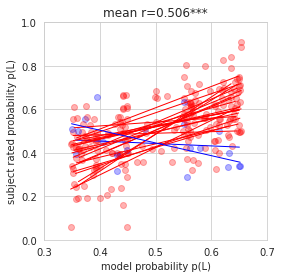

In [106]:
# df_pmod = pd.read_csv('./local_output/practice_io_jump_freq.csv')
df_pmod = pd.read_csv('./local_output_mean/practice_io_jump_freq.csv')
plot_bins(df_pmod, sj_idx=jf_sj, model=None)

In [107]:
df = pd.read_csv('../model_comparison/local_output/subject_practice.csv')
jf_sj = np.where(df.idxmax(axis=1)=='rw')
jf_sj

(array([ 4,  6,  7, 16, 19, 23]),)

0.23284801971326377 3.224028140729864 0.002907369080238934


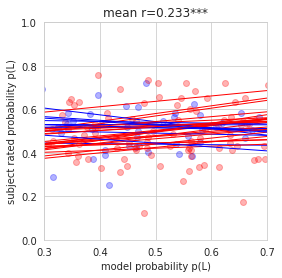

In [108]:
# df_pmod = pd.read_csv('./local_output/practice_rw.csv')
df_pmod = pd.read_csv('./local_output_mean/practice_rw.csv')
plot_bins(df_pmod, sj_idx=None, model=None)
# plt.savefig('./figs/bins_practice_io_jump_freq_all.png', bbox_inches='tight')

#### sensitivity

In [17]:
import scipy

def plot_bins_gen(df,sj_idx=None,cut_num=10,model=None):
    """bin average then correlate"""
    fig, ax = plt.subplots(figsize=(4,4))
    all_sj = np.unique(df['subject'])
    if sj_idx is not None:
        sj_ls = all_sj[sj_idx]
    else:
        sj_ls = all_sj
    n_sj = len(sj_ls)
    r_sj = np.empty((n_sj,))
    model_sj = np.empty((n_sj, cut_num))
    rate_sj = np.empty((n_sj, cut_num))
    model_rec = []
    bin_rec = []
#     for idx, sj in enumerate(np.unique(df['subject'])):
    for idx, sj in enumerate(sj_ls):
        df_sj = df[df['subject']==sj]
#         df_tmp = df_sj.dropna(subset=['p1'])
        df_tmp = df_sj
        model_rank = df_tmp['pmod_mean'].rank(method='max')
        model_cut = df_tmp.groupby(pd.qcut(model_rank, cut_num))['pmod_mean'].mean().values
        rate_cut = df_tmp.groupby(pd.qcut(model_rank, cut_num))['gen_p1g2'].mean().values
        nas = np.logical_and(np.isnan(model_cut), np.isnan(rate_cut)) # get rid of nans
        # demean
#         mc_dm = demean(model_cut[~nas])
#         rc_dm = demean(rate_cut[~nas])
#         pr, pv = scipy.stats.pearsonr(mc_dm, rc_dm)
#         sns.regplot(x=mc_dm, y=rc_dm)
        # no demean
        pr, pv = scipy.stats.pearsonr(model_cut[~nas], rate_cut[~nas])
#         print(f'subject %d, pearsonr %.3f, pval %.3f' %(sj, pr, pv))
        if pr > 0:
            color = 'r'
        else:
            color = 'b'
#         sns.lineplot(x=np.arange(0, cut_num), y=model_cut[~nas], color=color, ax=ax)#, ci=None,
#                     scatter_kws={'alpha':0.3}, line_kws={'linewidth':1})      
        
        r_sj[idx] = pr
        model_sj[idx,:] = model_cut
        rate_sj[idx,:] = rate_cut
        
        model_rec.append(model_cut)
        bin_rec.append(np.arange(0,len(model_cut)))
    dff = pd.DataFrame({'Generative p(L) bin': np.concatenate(bin_rec), 'Model predicted p(L) bin': np.concatenate(model_rec)})
#     print(dff)
    sns.boxplot(data=dff, x='Generative p(L) bin', y='Model predicted p(L) bin')

#     ax.set_aspect('equal')#, adjustable='box')
#     plt.plot([0,1],[0,1], 'k-')
#     plt.xlim(-2.2,2.2)
#     plt.ylim(-2.2,2.2)
    # plt.xlim(0.,1)
    # plt.ylim(0.,1)
    plt.xlabel('generative probability p(L|H)')
    plt.ylabel('model predictive probability p(L)')
    t0, p0 = scipy.stats.ttest_rel(r_sj,np.zeros((n_sj,)))
    print(np.mean(r_sj), t0, p0)
#     plt.title(f'Pearson r={np.mean(r_sj):.3f} (t({len(r_sj)})={t0:.3f}, p={p0:.3e})')
    plt.title(f'mean r={np.mean(r_sj):.2f}***')
    if model is not None:
        fig_name = f'bins_{model:s}.pdf'
        fig_path = os.path.join('figs',fig_name)
        plt.savefig(fig_path, bbox_inches='tight')

def demean(df):
    """demean"""
    df_dm = (df-np.mean(df))/np.std(df)
    return df_dm

In [18]:
import scipy

def plot_bins_gensj(df,sj_idx=None,cut_num=10,model=None):
    """bin average then correlate"""
    fig, ax = plt.subplots(figsize=(2.5,4))
    all_sj = np.unique(df['subject'])
    if sj_idx is not None:
        sj_ls = all_sj[sj_idx]
    else:
        sj_ls = all_sj
    n_sj = len(sj_ls)
    r_sj = np.empty((n_sj,))
    model_sj = np.empty((n_sj, cut_num))
    rate_sj = np.empty((n_sj, cut_num))
    model_rec = []
    bin_rec = []
    corr_num = 0
#     for idx, sj in enumerate(np.unique(df['subject'])):
    for idx, sj in enumerate(sj_ls):
        df_sj = df[df['subject']==sj]
        df_tmp = df_sj.dropna(subset=['p1'])
#         df_tmp = df_sj
        model_rank = df_tmp['gen_p1g2'].rank(method='max')
        model_cut = df_tmp.groupby(pd.qcut(model_rank, cut_num))['gen_p1g2'].mean().values
        rate_cut = df_tmp.groupby(pd.qcut(model_rank, cut_num))['p1'].mean().values
        nas = np.logical_and(np.isnan(model_cut), np.isnan(rate_cut)) # get rid of nans
        # no demean
        pr, pv = scipy.stats.pearsonr(model_cut[~nas], rate_cut[~nas])
#         print(f'subject %d, pearsonr %.3f, pval %.3f' %(sj, pr, pv))
        if rate_cut[1]-rate_cut[0]>0:
            color='r'
            corr_num += 1
        else:
            color='b'
        sns.lineplot(x=[0.3,0.7], y=rate_cut, color=color, alpha=0.6)
        r_sj[idx] = pr
        model_sj[idx,:] = model_cut
        rate_sj[idx,:] = rate_cut

    dff = pd.DataFrame(rate_sj, columns=['L','H'])
    sns.boxplot(data=dff)
#     sns.violinplot(data=dff)
    sns.stripplot(data=dff, color='.3')

    plt.xlabel('generative probability p(L|H)')
    plt.ylabel('subject rated probability p(L)')
#     t0, p0 = scipy.stats.ttest_rel(r_sj,np.zeros((n_sj,)))
    print(dff.agg({'mean','std'}))
    t0, p0 = scipy.stats.ttest_rel(dff['L'], dff['H'])
    print(np.mean(r_sj), t0, p0, corr_num, corr_num/dff.shape[0])
#     plt.title(f'Pearson r={np.mean(r_sj):.3f} (t({len(r_sj)})={t0:.3f}, p={p0:.3e})')
#     plt.title(f't({dff.shape[0]})={t0:.2f}***')
    if model is not None:
        fig_name = f'bins_{model:s}.pdf'
        fig_path = os.path.join('figs',fig_name)
        plt.savefig(fig_path, bbox_inches='tight')

def demean(df):
    """demean"""
    df_dm = (df-np.mean(df))/np.std(df)
    return df_dm

In [19]:
# df_pmod = pd.read_csv('./local_output/fmri_io_jump_freq.csv')
df_pmod = pd.read_csv('./local_output_mean/fmri_io_jump_freq.csv')
df_gen = pd.read_csv('../data/fmri_behavioural_new.csv')
df_genmod = pd.concat([df_gen, df_pmod], axis=1)
df_gm = df_genmod.loc[:,~df_genmod.columns.duplicated()]
df_gm.shape

(44200, 22)

             L         H
std   0.063169  0.041844
mean  0.470835  0.534374
0.42857142857142855 -4.437887826725164 9.0826387569464e-05 25 0.7142857142857143


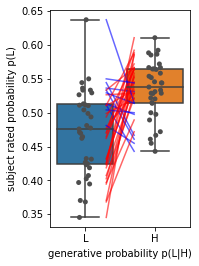

In [20]:
plot_bins_gensj(df_gm, sj_idx=None, cut_num=2)
# plt.savefig('./figs/genobs_2bins_fmri.png', bbox_inches='tight')

In [21]:
# df_pmod = pd.read_csv('./local_output/practice_io_jump_freq.csv')
df_pmod = pd.read_csv('./local_output_mean/practice_io_jump_freq.csv')
df_gen = pd.read_csv('../data/practice_behavioural.csv')
df_genmod = pd.concat([df_gen, df_pmod], axis=1)
df_gm = df_genmod.loc[:,~df_genmod.columns.duplicated()]
df_gm.shape

(40040, 22)

             L         H
std   0.064993  0.073625
mean  0.491769  0.526089
0.3333333333333333 -2.1115855529555456 0.04262282048318673 22 0.6666666666666666


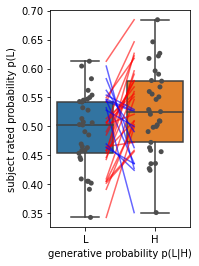

In [22]:
plot_bins_gensj(df_gm, sj_idx=None, cut_num=2)
# plt.savefig('./figs/genobs_2bins_practice.png', bbox_inches='tight')

In [23]:
import scipy

def plot_bins_genmod(df,sj_idx=None,cut_num=10,model=None):
    """bin average then correlate"""
    fig, ax = plt.subplots(figsize=(2.5,4))
    all_sj = np.unique(df['subject'])
    if sj_idx is not None:
        sj_ls = all_sj[sj_idx]
    else:
        sj_ls = all_sj
    n_sj = len(sj_ls)
    r_sj = np.empty((n_sj,))
    model_sj = np.empty((n_sj, cut_num))
    rate_sj = np.empty((n_sj, cut_num))
    model_rec = []
    bin_rec = []
    corr_num = 0
#     for idx, sj in enumerate(np.unique(df['subject'])):
    for idx, sj in enumerate(sj_ls):
        df_sj = df[df['subject']==sj]
#         df_tmp = df_sj.dropna(subset=['p1'])
        df_tmp = df_sj
        model_rank = df_tmp['gen_p1g2'].rank(method='max')
        model_cut = df_tmp.groupby(pd.qcut(model_rank, cut_num))['gen_p1g2'].mean().values
        rate_cut = df_tmp.groupby(pd.qcut(model_rank, cut_num))['pmod_mean'].mean().values
        nas = np.logical_and(np.isnan(model_cut), np.isnan(rate_cut)) # get rid of nans
        # no demean
        pr, pv = scipy.stats.pearsonr(model_cut[~nas], rate_cut[~nas])
#         print(f'subject %d, pearsonr %.3f, pval %.3f' %(sj, pr, pv))
        if rate_cut[1]-rate_cut[0]>0:
            color='r'
            corr_num += 1
        else:
            color='b'
        sns.lineplot(x=[0.3,0.7], y=rate_cut, color=color, alpha=0.6)
        r_sj[idx] = pr
        model_sj[idx,:] = model_cut
        rate_sj[idx,:] = rate_cut

    dff = pd.DataFrame(rate_sj, columns=['L','H'])
    sns.boxplot(data=dff)
#     sns.violinplot(data=dff)
    sns.stripplot(data=dff, color='.3')

    plt.xlabel('generative probability p(L|H)')
    plt.ylabel('model predicted probability p(L)')
    print(dff.agg({'mean','std'}))
    t0, p0 = scipy.stats.ttest_rel(dff['L'], dff['H'])
    print(np.mean(r_sj), t0, p0, corr_num, corr_num/dff.shape[0])
#     plt.title(f'Pearson r={np.mean(r_sj):.3f} (t({len(r_sj)})={t0:.3f}, p={p0:.3e})')
#     plt.title(f't({dff.shape[0]})={t0:.2f}***')
    if model is not None:
        fig_name = f'bins_{model:s}.pdf'
        fig_path = os.path.join('figs',fig_name)
        plt.savefig(fig_path, bbox_inches='tight')

def demean(df):
    """demean"""
    df_dm = (df-np.mean(df))/np.std(df)
    return df_dm

In [109]:
# df_pmod = pd.read_csv('./local_output/fmri_io_jump_freq.csv')
df_pmod = pd.read_csv('./local_output_mean/fmri_io_jump_freq.csv')
df_gen = pd.read_csv('../data/fmri_behavioural_new.csv')
df_genmod = pd.concat([df_gen, df_pmod], axis=1)
df_gm = df_genmod.loc[:,~df_genmod.columns.duplicated()]
df_gm.shape

(44200, 22)

             L         H
std   0.021236  0.015745
mean  0.475385  0.543599
1.0 -16.79323841562803 4.970994391794382e-18 35 1.0


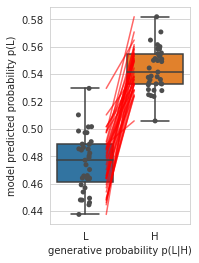

In [110]:
plot_bins_genmod(df_gm, sj_idx=None, cut_num=2)
plt.savefig('./figs/genmod_2bins_fmri.png', bbox_inches='tight')

In [26]:
# df_pmod = pd.read_csv('./local_output/practice_io_jump_freq.csv')
df_pmod = pd.read_csv('./local_output_mean/practice_io_jump_freq.csv')
df_gen = pd.read_csv('../data/practice_behavioural.csv')
df_genmod = pd.concat([df_gen, df_pmod], axis=1)
df_gm = df_genmod.loc[:,~df_genmod.columns.duplicated()]
df_gm.shape

(40040, 22)

             L         H
std   0.019513  0.018413
mean  0.481589  0.535262
0.8787878787878788 -10.04328901173223 2.0395307316943235e-11 31 0.9393939393939394


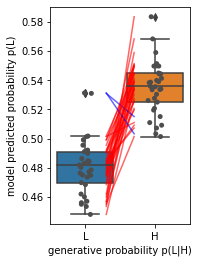

In [27]:
plot_bins_genmod(df_gm, sj_idx=None, cut_num=2)
# plt.savefig('./figs/genmod_2bins_practice.png', bbox_inches='tight')

#### jumps

In [28]:
# df_pmod = pd.read_csv('./local_output/fmri_io_jump_freq.csv')
df_pmod = pd.read_csv('./local_output_mean/fmri_io_jump_freq.csv')
df_gen = pd.read_csv('../data/fmri_behavioural_new.csv')
df_genmod = pd.concat([df_gen, df_pmod], axis=1)
df_gm = df_genmod.loc[:,~df_genmod.columns.duplicated()]
df_gm.shape

(44200, 22)

In [81]:
n=0
df6 = df_gm[(df_gm['subject']==44) & (df_gm['session']==n+1)]
# df6 = df_gm[df_gm['subject']==41]

<AxesSubplot:ylabel='gen_p1g2'>

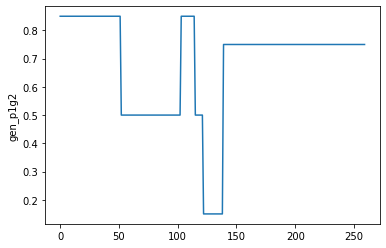

In [82]:
# sns.lineplot(data=df6, x='trial', y='gen_p1g2')
sns.lineplot(data=df6, x=np.arange(df6.shape[0]), y='gen_p1g2')

<ErrorbarContainer object of 3 artists>

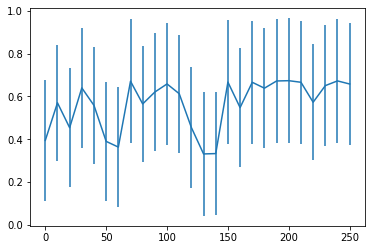

In [83]:
plt.errorbar(x=np.arange(df6.shape[0])[::10], y=df6['pmod_mean'][::10], yerr=df6['pmod_sd'][::10])

<AxesSubplot:>

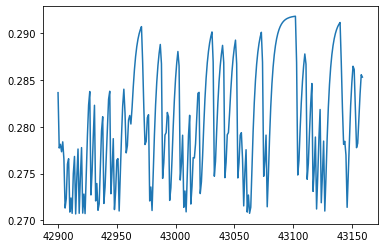

In [84]:
df6['pmod_sd'].plot()

In [85]:
df_dist = pd.read_csv('./local_output_mean/fmri_io_jump_freq_p1dist.csv', header=None)

<AxesSubplot:ylabel='gen_p1g2'>

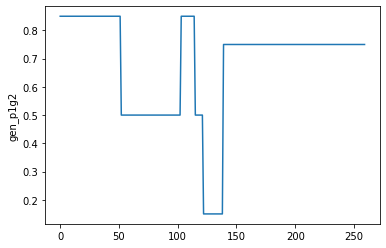

In [86]:
# sns.lineplot(data=df6, x='trial', y='gen_p1g2')
sns.lineplot(data=df6, x=np.arange(df6.shape[0]), y='gen_p1g2')

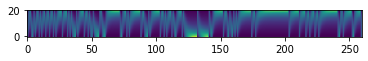

In [88]:
df_dist_tmp = df_dist.iloc[:,0+260*n:(n+1)*260]
df_dist_tmp.shape
plt.imshow(df_dist_tmp)
plt.gca().invert_yaxis()

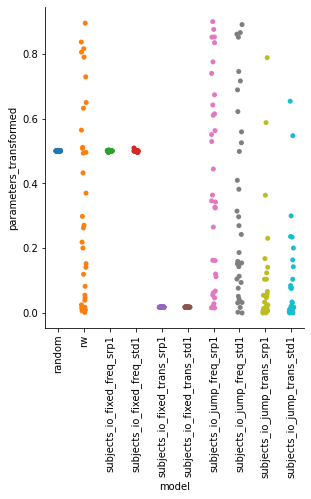

In [43]:
df = pd.read_csv('./params/practice_rt.csv')
df['parameters_transformed'] = df['parameters'].apply(sig)
g = sns.catplot(data=df, x='model', y='parameters_transformed')
g.set_xticklabels(rotation=90)

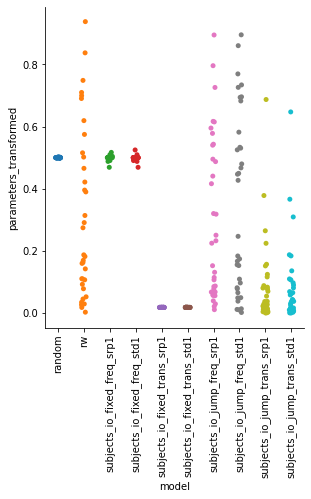

In [41]:
df = pd.read_csv('./params/fmri_rt.csv')
df['parameters_transformed'] = df['parameters'].apply(sig)
g = sns.catplot(data=df, x='model', y='parameters_transformed')
g.set_xticklabels(rotation=90)

In [173]:
df_model = pd.read_csv('../vba/local_output/subject_fmri.csv')

In [174]:
df_model.head()

,rw,subjects_io_jump_freq
0,6.495508e-02,0.935045
1,1.576723e-16,1.000000
2,5.893816e-07,0.999999
3,1.892668e-07,1.000000
4,7.662771e-05,0.999923


In [175]:
df_model.mean().round(2)

rw                       0.36
subjects_io_jump_freq    0.64
dtype: float64

In [195]:
df = pd.read_csv('./params/fmri.csv')
df['parameters_transformed'] = df['parameters'].apply(sig)
df['subject'] = np.tile(np.arange(35),len(np.unique(df['model'])))

In [196]:
df_model[df_model['subjects_io_jump_freq']>df_model['rw']].index.shape

(22,)

In [197]:
df_model[df_model['subjects_io_jump_freq']<=df_model['rw']].index.shape

(13,)

In [198]:
sj_io = df_model[df_model['subjects_io_jump_freq']>df_model['rw']].index.to_list()

In [199]:
sj_rw = df_model[df_model['subjects_io_jump_freq']<=df_model['rw']].index.to_list()

In [200]:
df_rwio = pd.concat([df[df['model']=='rw'], df[df['model']=='subjects_io_jump_freq']])

In [201]:
df_rwio

,model,log_evidence,parameters,parameters_transformed,subject
35,rw,174.013026,-1.184415,0.234259,0
36,rw,139.524618,0.247402,0.561537,1
37,rw,169.511040,-1.680025,0.157092,2
38,rw,168.146916,-0.470156,0.384579,3
39,rw,157.677209,-2.654845,0.065691,4
...,...,...,...,...,...
170,subjects_io_jump_freq,161.297254,-0.411092,0.398650,30
171,subjects_io_jump_freq,198.580367,-2.635108,0.066913,31
172,subjects_io_jump_freq,138.738194,-4.786019,0.008277,32
173,subjects_io_jump_freq,184.403594,-0.413175,0.398151,33


In [202]:
io_status = pd.concat([df_model['subjects_io_jump_freq']>df_model['rw'].values,df_model['subjects_io_jump_freq']>df_model['rw'].values])

In [203]:
df_rwio['io_status'] = io_status.values

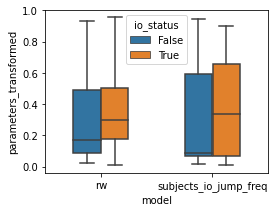

In [226]:
fig, ax = plt.subplots(figsize=(4,3))
sns.boxplot(data=df_rwio, x='model', y='parameters_transformed', hue='io_status', ax=ax, width=0.5)
fig_path = os.path.join('figs','params_group.pdf')
plt.savefig(fig_path, bbox_inches='tight')

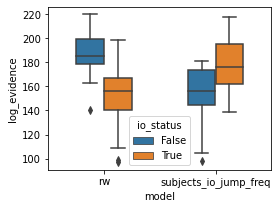

In [227]:
fig, ax = plt.subplots(figsize=(4,3))
sns.boxplot(data=df_rwio, x='model', y='log_evidence', hue='io_status', ax=ax, width=0.5)
fig_path = os.path.join('figs','log_evidence.pdf')
plt.savefig(fig_path, bbox_inches='tight')

In [206]:
dfio = df_rwio[df_rwio['model']=='subjects_io_jump_freq']

In [209]:
dfio_t=dfio[dfio['io_status']==True]['parameters_transformed']
dfio_f=dfio[dfio['io_status']==False]['parameters_transformed']

In [210]:
from scipy.stats import ttest_ind

In [211]:
ttest_ind(dfio_t, dfio_f)

Ttest_indResult(statistic=0.4442541972522644, pvalue=0.6597586208780065)

In [212]:
dfrw = df_rwio[df_rwio['model']=='rw']
dfrw_t=dfrw[dfrw['io_status']==True]['parameters_transformed']
dfrw_f=dfrw[dfrw['io_status']==False]['parameters_transformed']

In [213]:
ttest_ind(dfrw_t, dfrw_f)

Ttest_indResult(statistic=0.2950148826113631, pvalue=0.7698306469437093)

In [214]:
import scipy

def plot_bins(df,sj_idx=None,cut_num=10,model=None):
    """bin average then correlate"""
    fig, ax = plt.subplots(figsize=(4,4))
    all_sj = np.unique(df['subject'])
    if sj_idx is not None:
        sj_ls = all_sj[sj_idx]
    else:
        sj_ls = all_sj
    n_sj = len(sj_ls)
    r_sj = np.empty((n_sj,))
    model_sj = np.empty((n_sj, cut_num))
    rate_sj = np.empty((n_sj, cut_num))



#     for idx, sj in enumerate(np.unique(df['subject'])):
    for idx, sj in enumerate(sj_ls):
        df_sj = df[df['subject']==sj]
        df_tmp = df_sj.dropna(subset=['p1'])
        model_rank = df_tmp['pmod'].rank(method='max')
        model_cut = df_tmp.groupby(pd.qcut(model_rank, cut_num))['pmod'].mean().values
        rate_cut = df_tmp.groupby(pd.qcut(model_rank, cut_num))['p1'].mean().values
        nas = np.logical_and(np.isnan(model_cut), np.isnan(rate_cut)) # get rid of nans
        # demean
#         mc_dm = demean(model_cut[~nas])
#         rc_dm = demean(rate_cut[~nas])
#         pr, pv = scipy.stats.pearsonr(mc_dm, rc_dm)
#         sns.regplot(x=mc_dm, y=rc_dm)
        # no demean
#         print(f'subject %d, pearsonr %.3f, pval %.3f' %(sj, pr, pv))
        pr, pv = scipy.stats.pearsonr(model_cut[~nas], rate_cut[~nas])
        sns.regplot(x=model_cut[~nas], y=rate_cut[~nas])      
        
        r_sj[idx] = pr
        model_sj[idx,:] = model_cut
        rate_sj[idx,:] = rate_cut


    ax.set_aspect('equal')#, adjustable='box')
    plt.plot([0,1],[0,1], 'k-')
#     plt.xlim(-2.2,2.2)
#     plt.ylim(-2.2,2.2)
    # plt.xlim(0.,1)
    # plt.ylim(0.,1)
    plt.xlabel('Bayes-optimal model probability')
    plt.ylabel('Participant rated probability')
    t0, p0 = scipy.stats.ttest_rel(r_sj,np.zeros((n_sj,)))
    plt.title(f'Pearson r={np.mean(r_sj):.3f} (t({len(r_sj)})={t0:.3f}, p={p0:.3e})')
    if model is not None:
        fig_name = f'bins_{model:s}.pdf'
        fig_path = os.path.join('figs',fig_name)
        plt.savefig(fig_path, bbox_inches='tight')

def demean(df):
    """demean"""
    df_dm = (df-np.mean(df))/np.std(df)
    return df_dm

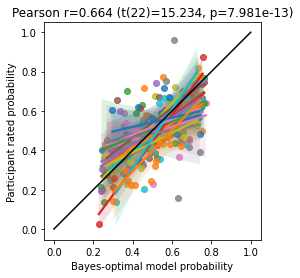

In [217]:
df_pmod = pd.read_csv('./output/fmri_io_jump_freq.csv')
io_idx = dfio[dfio['io_status']==True]['subject']
plot_bins(df_pmod, sj_idx=io_idx,model=None)

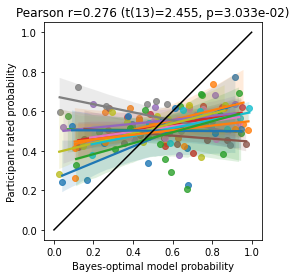

In [223]:
df_pmod = pd.read_csv('./output/fmri_rw.csv')
io_idx = dfio[dfio['io_status']==False]['subject']
plot_bins(df_pmod, sj_idx=io_idx,model=None)

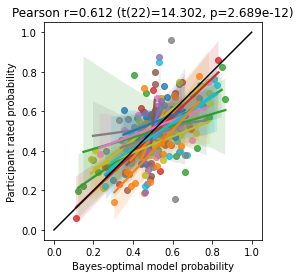

In [219]:
df_pmod = pd.read_csv('./local_output/fmri_subjects_io_jump_freq.csv')
io_idx = dfio[dfio['io_status']==True]['subject']
plot_bins(df_pmod, sj_idx=io_idx,model=None)

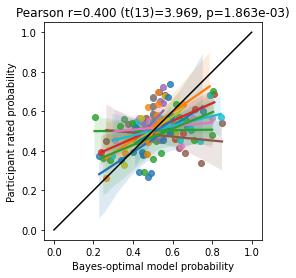

In [220]:
io_idx = dfio[dfio['io_status']==False]['subject']
plot_bins(df_pmod, sj_idx=io_idx,model=None)

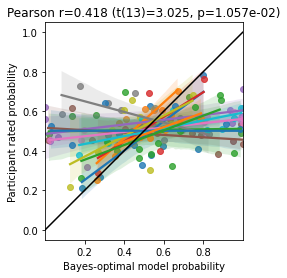

In [221]:
df_pmod = pd.read_csv('./local_output/fmri_rw.csv')
io_idx = dfio[dfio['io_status']==False]['subject']
plot_bins(df_pmod, sj_idx=io_idx,model=None)

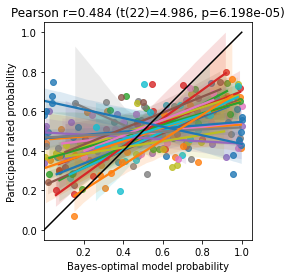

In [222]:
io_idx = dfio[dfio['io_status']==True]['subject']
plot_bins(df_pmod, sj_idx=io_idx,model=None)